# Exam -  Tuesday 16, June 2020 - solutions

**Scientific Programming - Data Science @ University of Trento**

## [Download exercises and solutions](../../_static/datasciprolab-2020-06-16-exam.zip)

## Introduction

* **Taking part to this exam erases any vote you had before**



### Grading


* **Correct implementations**: Correct implementations with the required complexity grant you full grade.
* **Partial implementations**: Partial implementations _might_ still give you a few points. If you just can't solve an exercise,  try to solve it at least for some subcase (i.e. array of fixed size 2) commenting why you did so. 

### Valid code

<div class="alert alert-warning">

**WARNING**: MAKE SURE ALL EXERCISE FILES AT LEAST COMPILE !!! 
10 MINS BEFORE THE END OF THE EXAM I WILL ASK YOU TO DO A FINAL CLEAN UP OF THE CODE 
</div>



<div class="alert alert-warning">

**WARNING**: _ONLY_ IMPLEMENTATIONS OF THE PROVIDED FUNCTION SIGNATURES WILL BE EVALUATED !!!!!!!!! <br/>    

</div>


For example, if you are given to implement: 

```python
    def f(x):
        raise Exception("TODO implement me")
```

and you ship this code:

``` python
def my_f(x):
    # a super fast, correct and stylish implementation

def f(x):
    raise Exception("TODO implement me")
```

We will assess only the latter one `f(x)`, and conclude it doesn't work at all :P   !!!!!!!

**Helper functions**

Still, you are allowed to define any extra helper function you might need. If your `f(x)` implementation calls some other function you defined like `my_f` here, it is ok:

```python
# Not called by f, will get ignored:
def my_g(x):
    # bla

# Called by f, will be graded:
def my_f(y,z):
    # bla

def f(x):
    my_f(x,5)
    

```



### How to edit and run

To edit the files, you can use any editor of your choice,  you can find them under _Applications->Programming_:

* **Visual Studio Code**
* Editra is easy to use, you can find it under _Applications->Programming->Editra_.
* Others could be _GEdit_ (simpler), or _PyCharm_ (more complex).

To run the tests, use **the Terminal** which can be found in _Accessories -> Terminal_ 



<div class="alert alert-info">

**IMPORTANT**: Pay close attention to the comments of the functions.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ modify function signatures! Just provide the implementation.
</div>

<div class="alert alert-warning">

**WARNING**: <i>DON'T</i> change the existing test methods, just add new ones !!!  You can add as many as you want.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ create other files. If you still do it, they won't be evaluated.
</div>




### Debugging 

If you need to print some debugging information, you are allowed to put extra <code>print</code>
    statements in the function bodies.


<div class="alert alert-warning">

**WARNING:** even if print statements are allowed, be careful with prints that might
     break your function! 
</div>


For example, avoid stuff like this: 

```python
x = 0
print(1/x)
```


### What to do

1) Download  `datasciprolab-2020-06-16-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```

datasciprolab-2020-06-16-FIRSTNAME-LASTNAME-ID
   exam-2020-06-16-exercise.ipynb
   theory.txt
   linked_list_exercise.py
   linked_list_test.py
   bin_tree_exercise.py
   bin_tree_test.py
```

2) Rename `datasciprolab-2020-06-16-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `datasciprolab-2020-06-16-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually

## Part A - Zoom surveillance

A training center holds online courses with [Zoom software](https://zoom.us/). Participants attendance is mandatory, and teachers want to determine who left, when and for what reason. Zoom allows to save a meeting log in a sort of CSV format which holds the timings of joins and leaves of each student. You will clean the file content and show relevant data in charts. 

Basically, you are going to build a surveillance system to monitor YOU. Welcome to digital age.

### CSV format

You are provided with the file  `UserQos_12345678901.csv`. Unfortunately, it is a weird CSV which actually looks like two completely different CSVs were merged together, one after the other. It contains the following:

* 1st line: general meeting header
* 2nd line: general meeting data
* 3rd line: empty
* 4th line completely different header for participant sessions for that meeting. Each session contains a join time and a leave time, and each participant can have multiple sessions in a meeting.
* 5th line and following: sessions data

The file has lots of useless fields, try to explore it and understand the format (if you want, you may use LibreOffice Calc to help yourself)

Here we only show the few fields we are actually interested in, and examples of trasformations you should apply:

From general meeting information section:

- `Meeting ID`: `123 4567 8901`
- `Topic`: `Hydraulics Exam`
- `Start Time`: `"Apr 17, 2020 02:00 PM"` should become  `Apr 17, 2020` 

From participant sessions section:

- `Participant`: `Luigi` 
- `Join Time`: `01:54 PM` should become `13:54` 
- `Leave Time`: `03:10 PM(Luigi got disconnected from the meeting.Reason: Network connection error. )` should be split into two fields, one for actual leave time in `15:10` format and another one for disconnection reason.

There are 3 possible disconnection reasons (try to come up with a general way to parse them - notice that there is no dot at the end of transformed string):

- `(Luigi got disconnected from the meeting.Reason: Network connection error. )` should become `Network connection error`
- `(Bowser left the meeting.Reason: Host closed the meeting. )` should become `Host closed the meeting`
- `(Princess Toadstool left the meeting.Reason: left the meeting.)` should become `left the meeting`



Your first goal will be to load the dataset and restructure the data so it looks like this:

```python
[['meeting_id', 'topic', 'date', 'participant', 'join_time', 'leave_time', 'reason'],
 ['123 4567 8901','Hydraulics Exam','Apr 17, 2020','Luigi','13:54','15:10','Network connection error'],
 ['123 4567 8901','Hydraulics Exam','Apr 17, 2020','Luigi','15:12','15:54','left the meeting'],
 ['123 4567 8901','Hydraulics Exam','Apr 17, 2020','Mario','14:02','14:16','Network connection error'],
 ['123 4567 8901','Hydraulics Exam','Apr 17, 2020','Mario','14:19','15:02','Network connection error'],
 ['123 4567 8901','Hydraulics Exam','Apr 17, 2020','Mario','15:04','15:50','Network connection error'],
 ['123 4567 8901','Hydraulics Exam','Apr 17, 2020','Mario','15:52','15:55','Network connection error'],
 ['123 4567 8901','Hydraulics Exam','Apr 17, 2020','Mario','15:56','16:00','Host closed the meeting'],
 ...
]
```

To fix the times, you will first need to implement the following function.

Open Jupyter and start editing this notebook `exam-2020-06-16-exercise.ipynb`

### A1 time24

In [1]:
def time24(t):
    """ Takes a time string like '06:27 PM' and outputs a string like 18:27
    """
    #jupman_raise
    if t.endswith('AM'):
        if t.startswith('12:00'):
            return '00:00'
        else:
            return t.replace(' AM', '')
    else:
        if t.startswith('12:00'):
            return '12:00'
            
        h = '%0.d' % (int(t.split(':')[0]) + 12)
        
        return h + ':' + t.split(':')[1].replace(' PM','')
    #/jupman_raise
    
assert time24('12:00 AM') == '00:00'  # midnight
assert time24('01:06 AM') == '01:06' 
assert time24('09:45 AM') == '09:45'
assert time24('12:00 PM') == '12:00'  # special case, it's actually midday
assert time24('01:27 PM') == '13:27'
assert time24('06:27 PM') == '18:27'
assert time24('10:03 PM') == '22:03'

### A2 load

Implement a function which loads the file `UserQos_12345678901.csv` and RETURN a list of lists. 

To parse the file, you can use simple [CSV parsing](https://datasciprolab.readthedocs.io/en/latest/exercises/formats/formats-solution.html#2.-File-CSV) as seen in class (there is no need to use pandas)

In [2]:
import csv

def load(filepath): 
    #jupman-raise
    ret = []
    with open(filepath, encoding='utf-8', newline='') as f:

        lettore = csv.reader(f, delimiter=',')
        next(lettore)
        riga_meeting = next(lettore)
        meeting_id = riga_meeting[0]            
        topic = riga_meeting[1]
        meeting_date = riga_meeting[7]        
        next(lettore) # riga vuota
        next(lettore) # secondo header        
        ret.append(['meeting_id', 'topic','date', 'participant','join_time','leave_time','reason'])
        for riga in lettore:            
            session = {}
            if len(riga) > 0:
                ret.append([meeting_id,
                            topic,
                            meeting_date[:12],
                            riga[0],                            
                            time24(riga[10]), 
                            time24(riga[11].split('(')[0]),
                            riga[11].split('Reason: ')[1].split('.')[0]])
    return ret
    #/jupman-raise       

meeting_log = load('UserQos_12345678901.csv')

from pprint import pprint
pprint(meeting_log, width=150)

[['meeting_id', 'topic', 'date', 'participant', 'join_time', 'leave_time', 'reason'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Luigi', '13:54', '15:10', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Luigi', '15:12', '15:54', 'left the meeting'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '14:02', '14:16', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '14:19', '15:02', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '15:04', '15:50', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '15:52', '15:55', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '15:56', '16:00', 'Host closed the meeting'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Bowser', '14:15', '14:30', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr

In [3]:
EXPECTED_MEETING_LOG = \
[['meeting_id', 'topic', 'date', 'participant', 'join_time', 'leave_time', 'reason'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Luigi', '13:54', '15:10', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Luigi', '15:12', '15:54', 'left the meeting'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '14:02', '14:16', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '14:19', '15:02', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '15:04', '15:50', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '15:52', '15:55', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Mario', '15:56', '16:00', 'Host closed the meeting'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Bowser', '14:15', '14:30', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Bowser', '14:54', '15:03', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Bowser', '15:12', '15:40', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Bowser', '15:45', '16:00', 'Host closed the meeting'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Princess Toadstool', '13:56', '15:33', 'left the meeting'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Wario', '14:05', '14:10', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Wario', '14:15', '14:29', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Wario', '14:33', '15:10', 'left the meeting'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Wario', '15:25', '15:54', 'Network connection error'],
 ['123 4567 8901', 'Hydraulics Exam', 'Apr 17, 2020', 'Wario', '15:55', '16:00', 'Host closed the meeting']]

assert meeting_log == EXPECTED_MEETING_LOG

### A3.1 duration

Given two times as strings `a` and `b` in format like `17:34`, RETURN the duration in minutes between them as an integer. 

To calculate gap durations, **we assume a meeting NEVER ends after midnight**

In [4]:
def duration(a, b):
    #jupman-raise
    asp = a.split(':')    
    ta = int(asp[0])*60+int(asp[1]) 
    bsp = b.split(':')
    tb = int(bsp[0])*60 + int(bsp[1])
    return tb - ta
    #/jupman-raise
    
assert duration('15:00','15:34') == 34
assert duration('15:00','17:34') == 120 + 34
assert duration('15:50','16:12') == 22
assert duration('09:55','11:06') == 5 + 60 + 6
assert duration('00:00','00:01') == 1
#assert duration('11:58','00:01') == 3  # no need to support this case !!

### A3.2 calc_stats

We want to know something about the time each participant has been disconnected from the exam. We call such intervals `gaps`, which are the difference between a session leave time and successive session join time.

Implement the function `calc_stats` that given a cleaned log produced by `load`, RETURN a dictionary mapping each partecipant to a dictionary with these statistics:

- `max_gap` : the longest time in minutes in which the participant has been disconnected
- `gaps` : the number of disconnections happend to the participant during the meeting
- `time_away` : the total time in minutes during which the participant has been disconnected during the meeting

To calculate gap durations, **we assume a meeting NEVER ends after midnight**

For the data format details, see `EXPECTED_STATS` below.

<div class="alert alert-warning">

**To test the function, you DON'T NEED to have correctly implemented previous functions** 

</div>


In [5]:

def calc_stats(log):
    #jupman-raise
    ret = {}
    
    last_sessions = {}
    
    first = True
    for session in log:
        if first:
            first = False
            continue
        date = session[2]
        participant = session[3]
        join_time = session[4]
        leave_time = session[5]
        reason = session[6]
        
        if participant not in ret:
            ret[participant] = {'max_gap': 0,
                                'gaps': 0,
                                'time_away':0
                               }                                        
        
        if participant in last_sessions:
            last_leave_time = last_sessions[participant][5]                        
            gap = duration(last_leave_time, join_time)            
            ret[participant]['max_gap'] = max(gap, ret[participant]['max_gap'])
            ret[participant]['gaps'] += 1
            ret[participant]['time_away'] += gap
        
        last_sessions[participant] = session
    return ret
    #/jupman-raise
    

stats = calc_stats(meeting_log)

# in case you had trouble implementing load function, use this: 
#stats = calc_stats(EXPECTED_MEETING_LOG)

stats

{'Bowser': {'gaps': 3, 'max_gap': 24, 'time_away': 38},
 'Luigi': {'gaps': 1, 'max_gap': 2, 'time_away': 2},
 'Mario': {'gaps': 4, 'max_gap': 3, 'time_away': 8},
 'Princess Toadstool': {'gaps': 0, 'max_gap': 0, 'time_away': 0},
 'Wario': {'gaps': 4, 'max_gap': 15, 'time_away': 25}}

In [6]:
EXPECTED_STATS = {            'Bowser': {'gaps': 3, 'max_gap': 24, 'time_away': 38},
                               'Luigi': {'gaps': 1, 'max_gap': 2,  'time_away': 2},
                               'Mario': {'gaps': 4, 'max_gap': 3,  'time_away': 8},
                  'Princess Toadstool': {'gaps': 0, 'max_gap': 0,  'time_away': 0},
                               'Wario': {'gaps': 4, 'max_gap': 15, 'time_away': 25}}

assert stats == EXPECTED_STATS

### A4 viz

Produce a bar chart of the statistics you calculated before. For how to do it, see examples in [Visualiation tutorial](https://datasciprolab.readthedocs.io/en/latest/exercises/visualization/visualization-solution.html)

- participant names MUST be sorted in alphabetical order
- remember to put title, legend and axis labels

<div class="alert alert-warning">

**To test the function, you DON'T NEED to have correctly implemented previous functions** 

</div>


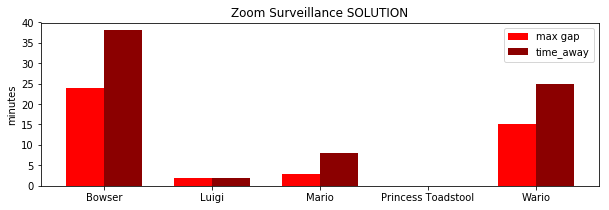

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def viz(stats):
    #jupman-raise
    
    xs = np.arange(len(stats))
    ys_max_gap = []
    ys_time_away = []
    
    labels = list(sorted(stats.keys()))
    
    for participant in sorted(stats):
        pstats = stats[participant]
        ys_max_gap.append(pstats['max_gap'])
        ys_time_away.append(pstats['time_away'])
        
    width = 0.35
    fig, ax = plt.subplots(figsize=(10,3))
    rects1 = ax.bar(xs - width/2, ys_max_gap, width, 
                    color='red', label='max gap')
    rects2 = ax.bar(xs + width/2, ys_time_away, width,
                    color='darkred', label='time_away')

    plt.xticks(xs, labels)
        
    ax.set_title('Zoom Surveillance SOLUTION')
    ax.legend()
    
    
    plt.ylabel('minutes')
    plt.savefig('surveillance.png')
    plt.show()
    #/jupman-raise
        
viz(stats)

# in case you had trouble implementing calc_stats, use this:
#viz(EXPECTED_STATS)


![surveillance](surveillance.png)

## Part B

### B1 Theory

**Write the solution in separate** `theory.txt` **file**

### B1.1 complexity

Given a list `L` of `n` positive integers, please compute the asymptotic computational complexity of the following function, explaining your reasoning.


```python
 
def my_max(L):
    M = -1
    for e in L:
        if e > M:
            M = e
    return M

def my_fun(L):
    n = len(L)
    out = 0
    for i in range(5):
        out = out + my_max(L[i:])
    return out
```

### B1.2 describe

Briefly describe what a bidirectional linked list is. How does it differ from a queue?

### B2 - LinkedList slice

**Open a text editor** and edit file `linked_list_exercise.py`

Implement the method `slice`:

```python
    def slice(self, start, end):
        """ RETURN a NEW LinkedList created by copying nodes of this list
            from index start INCLUDED to index end EXCLUDED
        
            - if start is greater or equal than end, returns an empty LinkedList
            - if start is greater than available nodes, returns an empty LinkedList
            - if end is greater than the available nodes, copies all items until the tail without errors
            - if start index is negative, raises ValueError
            - if end index is negative, raises ValueError            

            - IMPORTANT: All nodes in the returned LinkedList MUST be NEW
            - DO *NOT* modify original linked list
            - DO *NOT* add an extra size field
            - MUST execute in O(n), where n is the size of the list
            
        """
```

**Testing**: `python3 -m unittest linked_list_test.SliceTest`

**Example**:

In [8]:
from linked_list_solution import *

In [9]:
la = LinkedList()
la.add('g')
la.add('f')
la.add('e')
la.add('d')
la.add('c')
la.add('b')
la.add('a')

In [10]:
print(la)

LinkedList: a,b,c,d,e,f,g


Creates a **NEW** `LinkedList` copying nodes from index `2` INCLUDED up to index `5` EXCLUDED:

In [11]:
lb = la.slice(2,5)

In [12]:
print(lb)

LinkedList: c,d,e


Note original `LinkedList` is still intact:

In [13]:
print(la)

LinkedList: a,b,c,d,e,f,g


#### Special cases

If `start` is greater or equal then `end`, you get an empty `LinkedList`:

In [14]:
print(la.slice(5,3))

LinkedList: 


If `start` is greater than available nodes, you get an empty `LinkedList`:

In [15]:
print(la.slice(10,15))

LinkedList: 


If `end` is greater than the available nodes, you get a copy of all the nodes until the tail without errors:

In [16]:
print(la.slice(3,10))

LinkedList: d,e,f,g


Using negative indexes for either `start` , `end` or both raises `ValueError`:

```python
la.slice(-3,4)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-184-e3380bb66e77> in <module>()
----> 1 la.slice(-3,4)

~/Da/prj/datasciprolab/prj/exams/2020-06-16/linked_list_solution.py in slice(self, start, end)
     63 
     64         if start < 0:
---> 65             raise ValueError('Negative values for start are not supported! %s ' % start)
     66         if end < 0:
     67             raise ValueError('Negative values for end are not supported: %s' % end)

ValueError: Negative values for start are not supported! -3 
```

```python
la.slice(1,-2)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-185-8e09ec468c30> in <module>()
----> 1 la.slice(1,-2)

~/Da/prj/datasciprolab/prj/exams/2020-06-16/linked_list_solution.py in slice(self, start, end)
     65             raise ValueError('Negative values for start are not supported! %s ' % start)
     66         if end < 0:
---> 67             raise ValueError('Negative values for end are not supported: %s' % end)
     68 
     69         ret = LinkedList()

ValueError: Negative values for end are not supported: -2
```    

### B3 BinaryTree prune_rec


Implement the method `prune_rec`:

```python
    def prune_rec(self, el):
        """ MODIFIES the tree by cutting all the subtrees that have their 
            root node data equal to el. By 'cutting' we mean they are no longer linked 
            by the tree on which prune is called.

            - if prune is called on a node having data equal to el, raises ValueError
            
            - MUST execute in O(n) where n is the number of nodes of the tree
            - NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind
        """
```

**Testing**: `python3 -m unittest bin_tree_test.PruneRecTest`

**Example**:

In [17]:
from bin_tree_solution import *
from bin_tree_test import bt

In [18]:
t = bt('a',
            bt('b',
                   bt('z'),
                   bt('c',
                        bt('d'),
                        bt('z',
                               None,
                               bt('e')))),
            bt('z', 
                   bt('f'),
                   bt('z', 
                          None,
                          bt('g'))))

In [19]:
print(t)

a
├b
│├z
│└c
│ ├d
│ └z
│  ├
│  └e
└z
 ├f
 └z
  ├
  └g


In [20]:
t.prune_rec('z')

In [21]:
print(t)

a
├b
│├
│└c
│ ├d
│ └
└


In [22]:
t.prune_rec('c')

In [23]:
print(t)

a
├b
└


Trying to prune the root will throw a `ValueError`:

```python
t.prune_rec('a')

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-27-f8e8fa8a97dd> in <module>()
----> 1 t.prune_rec('a')

ValueError: Tried to prune the tree root !
```    

In [24]:
import sys
sys.path.append('../../')
import jupman
import linked_list_test
import bin_tree_test

jupman.run(linked_list_test)
jupman.run(bin_tree_test)

...................
----------------------------------------------------------------------
Ran 19 tests in 0.021s

OK
................
----------------------------------------------------------------------
Ran 16 tests in 0.026s

OK
